In [ ]:
#install ultralytics
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.7 MB/s eta 0:00:00


In [ ]:
#import YOLO from ultralytics
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
#mount your google drive if the dataset is there
from google.colab import drive
drive.mount('/content/dirve')

Mounted at /content/dirve


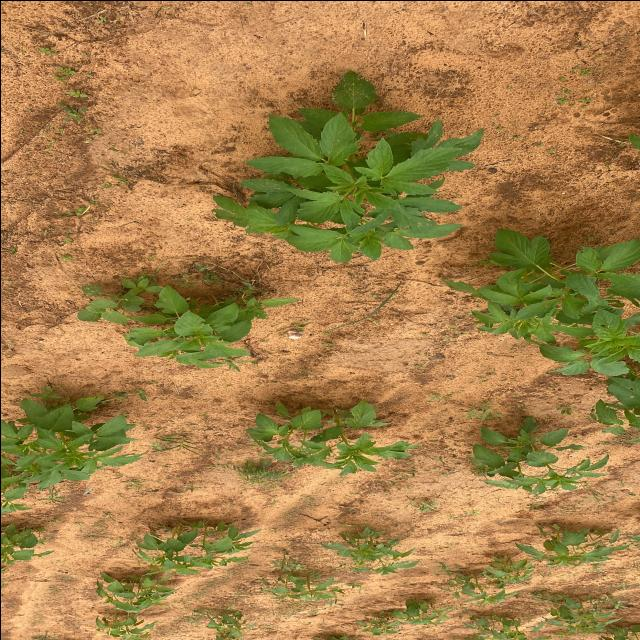

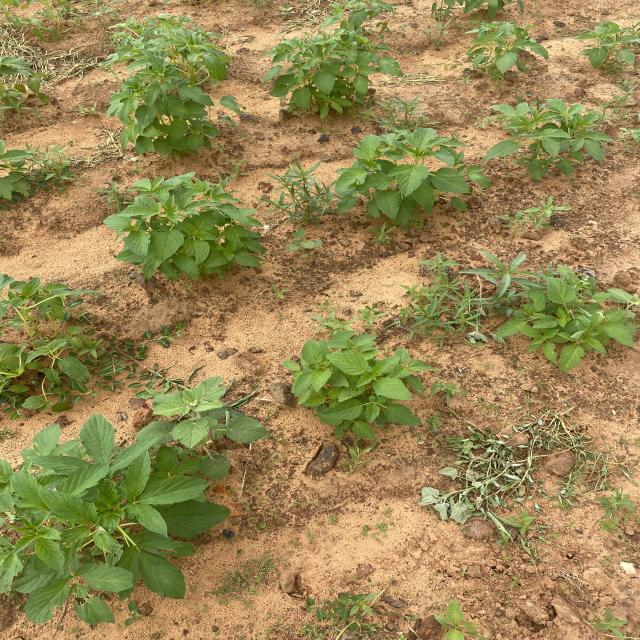

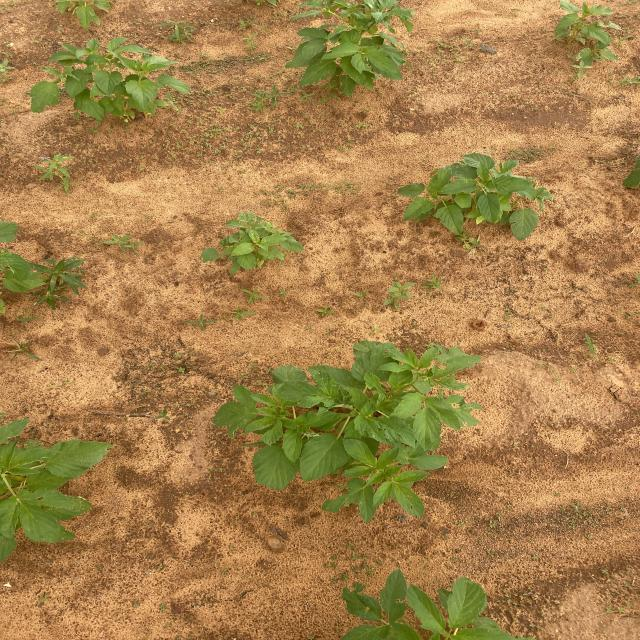

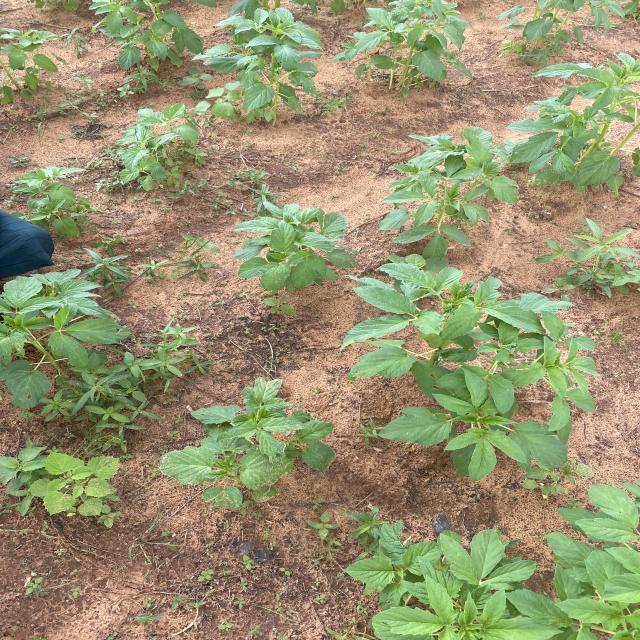

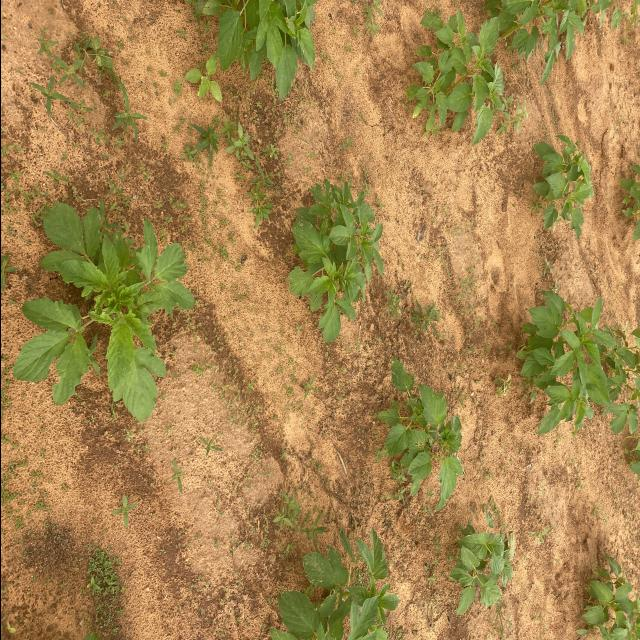

In [ ]:
from IPython.display import Image, display
import glob
import random

# Path to raw validation image
raw_image_path = ("/content/dirve/MyDrive/SESAME Plant Detection Dataset/train/images")

# Get image list
raw_images = glob.glob(f"{raw_image_path}/*.jpg")

# Randomly select 5 images
sample_images = random.sample(raw_images, 5)


for img in sample_images:
    display(Image(filename=img, width=300))


In [ ]:
#load the yolo model
model = YOLO('yolo26n.pt')

In [ ]:
#train with the your datase
result = model.train(data ="/content/dirve/MyDrive/SESAME Plant Detection Dataset/data.yaml", epochs=100, imgsz=640)

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dirve/MyDrive/SESAME Plant Detection Dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mas


image 1/1 /content/dirve/MyDrive/SESAME Plant Detection Dataset/train/images/IMG_7205_JPG.rf.9e28951d0712fae39ea77aeb7316c350.jpg: 640x640 15 SESAME_PLANTs, 11.1ms
Speed: 3.9ms preprocess, 11.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/predictions


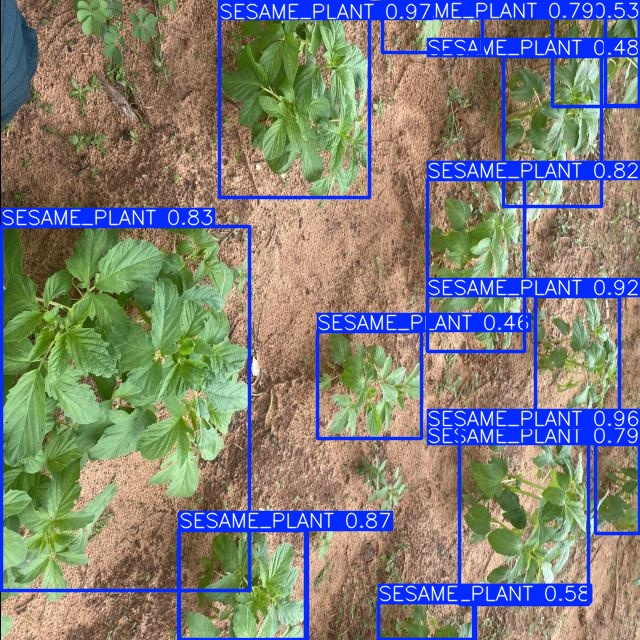


image 1/1 /content/dirve/MyDrive/SESAME Plant Detection Dataset/train/images/IMG_7144_JPG.rf.7f06ae4cb7d8932cc1212aac3cecf7ac.jpg: 640x640 11 SESAME_PLANTs, 28.9ms
Speed: 2.1ms preprocess, 28.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/predictions


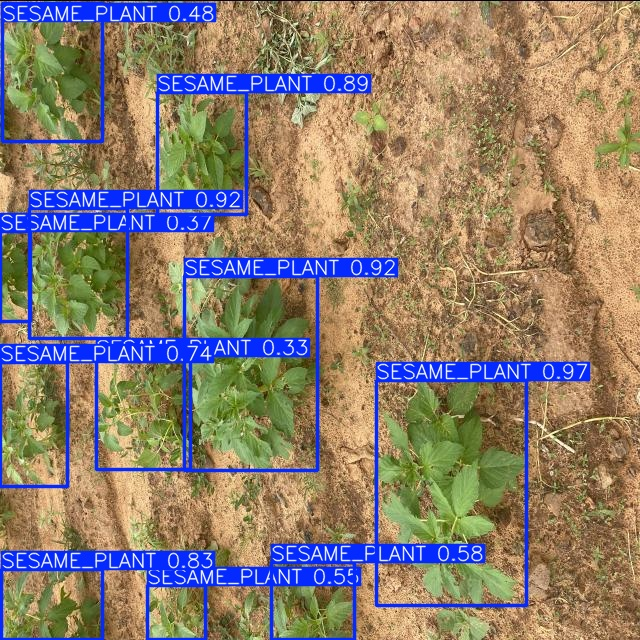


image 1/1 /content/dirve/MyDrive/SESAME Plant Detection Dataset/train/images/IMG_7202_JPG.rf.8a37c9c9b1203dd3075c102aeaac19d7.jpg: 640x640 16 SESAME_PLANTs, 55.9ms
Speed: 10.0ms preprocess, 55.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/predictions


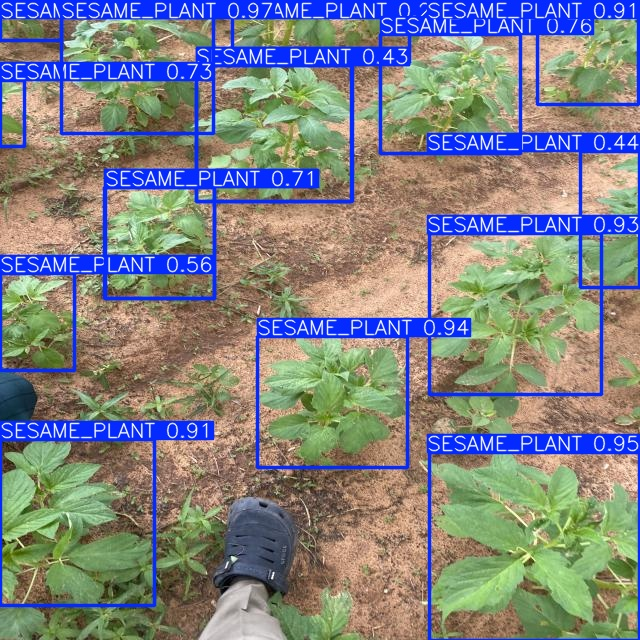


image 1/1 /content/dirve/MyDrive/SESAME Plant Detection Dataset/train/images/IMG_7208_JPG.rf.a52e0292bdacf6c7428377fccbf6ea04.jpg: 640x640 17 SESAME_PLANTs, 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/predictions


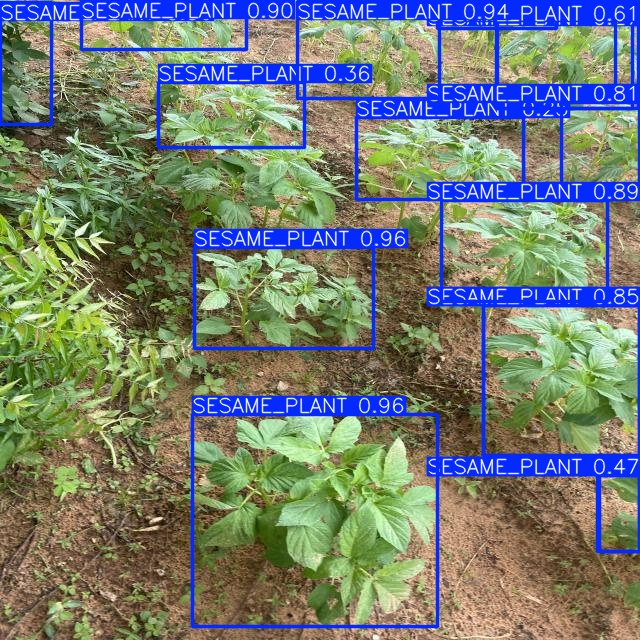


image 1/1 /content/dirve/MyDrive/SESAME Plant Detection Dataset/train/images/IMG_7086_JPG.rf.d3be770f8f7d64a2cdcaa1012f91338f.jpg: 640x640 20 SESAME_PLANTs, 16.5ms
Speed: 2.6ms preprocess, 16.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/predictions


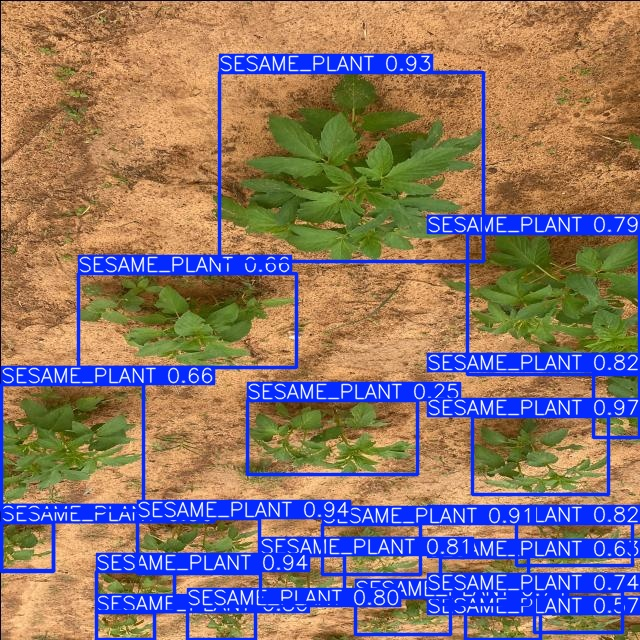

In [ ]:
import os

# Load the trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Path to images
image_path = "/content/dirve/MyDrive/SESAME Plant Detection Dataset/train/images"
all_images = glob.glob(os.path.join(image_path, "*.jpg"))

# Randomly select 5 images
sample_images = random.sample(all_images, 5)

# Run prediction and display results
for img_file in sample_images:
    # Run prediction and save output
    results = model.predict(source=img_file, save=True, save_dir="predictions", conf=0.25)

    # Display predicted images
    pred_img_path = os.path.join("predictions", os.path.basename(img_file))
    display(Image(filename=pred_img_path, width=300))


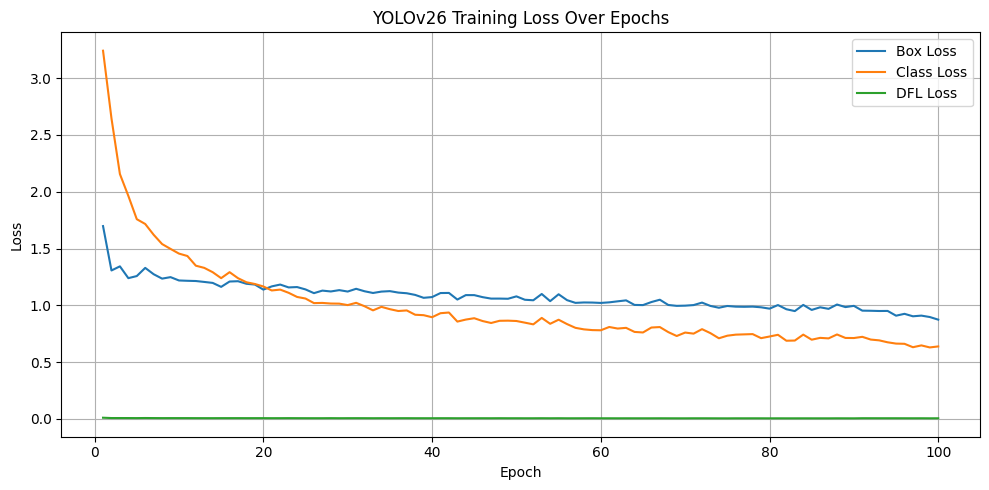

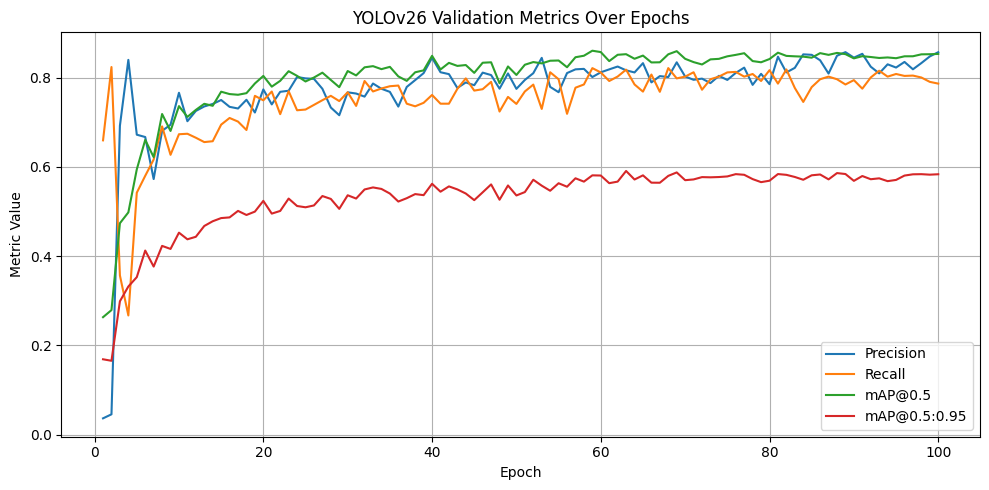

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Ultralytics results file
df = pd.read_csv("/content/runs/detect/train/results.csv")

# Remove leading/trailing spaces in column names (VERY IMPORTANT)
df.columns = df.columns.str.strip()


# Plot Training Losses
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['train/box_loss'], label='Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Class Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('YOLOv26 Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 # Plot Performance Metrics

plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('YOLOv26 Validation Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()